# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for feature selection
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier #ensemble model
from sklearn.naive_bayes import GaussianNB #probabilistic
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_val_predict
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report #evaluation 

from sklearn.preprocessing import LabelEncoder #preprocessing
from sklearn.model_selection import train_test_split #training and testing

from sklearn.metrics import accuracy_score

from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [2]:
# load the diabetes dataset
diabetes_data = pd.read_csv("diabetes_data_upload.csv")
diabetes_data.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
304,69,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Positive
394,59,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Negative
245,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
211,40,Male,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Negative
93,40,Female,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,Positive
65,40,Female,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Positive
188,70,Male,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,Positive
281,47,Male,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,Negative
289,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Negative
416,55,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive


In [3]:
#shape of the dataset
diabetes_data.shape

(520, 17)

The diabetes dataset has 520 rows and  17 columns.

In [4]:
# concise summary of the dataframe
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

From the above summary, the diabetes dataset has 520 data points and with 17 attributes with all values filled.

In [5]:
# checking to confirm ifthere are no missing values
diabetes_data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Label Encoding

Encoding categorical data to numbers before it is used to fit and evaluate a model.  
The machine learning algorithms will perform better in terms of accuracy and other performance metrics when the data is represented as a number instead of categorical to a model for training and testing.  


In [7]:
# changing the categorical values to numeric values
EncodedLabels=LabelEncoder() 
diabetes_data = diabetes_data.apply(EncodedLabels.fit_transform)
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Retrieving independent variables and dependent variables. Use them to create training and test data

In [8]:
X = diabetes_data.iloc[:,:-1] #independent variables
y = diabetes_data.iloc[:,-1:] #dependent variables

#Split the data for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
X_train.shape

(364, 16)

## Feature selection

Used the forward stepwise regression approach to select features that significantly contribute to model performance with 95% confidence as another technique of dimensionality reduction. one feature at a time is added as the threshold is monitored, alpha=0.95, until addition of a feature goes beyond the set mark at which point addition stops.

In [9]:
#forward regression method from https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py
#passing X,y as 
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1:]
#list to hold selected features
selectedFeatures =[]
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    bic={}
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            bic[model.bic]=included+[new_column]
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                selectedFeatures.append(best_feature)#storing the added feature

        if not changed:
            break
    print(model.summary())
    return included
    
b=forward_regression(X,y,0.05,verbose=True)#function call to forward regression

Add  Polyuria                       with p-value 6.38484e-68
Add  Polydipsia                     with p-value 1.99898e-23
Add  Gender                         with p-value 1.25289e-14
Add  Irritability                   with p-value 8.35468e-07
Add  Itching                        with p-value 1.53499e-05
Add  Genital thrush                 with p-value 1.43641e-05
Add  partial paresis                with p-value 0.0167456
Add  delayed healing                with p-value 0.0172687
                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     103.5
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          4.40e-109
Time:                        18:16:22   Log-Likelihood:                -93.038
No. Observations:                 520   AI

In [10]:
#selected features
print(selectedFeatures)

['Polyuria', 'Polydipsia', 'Gender', 'Irritability', 'Itching', 'Genital thrush', 'partial paresis', 'delayed healing']


8 out of 16 features have been selected and will be used to fit the models.

# Build the models and evaluate them. Random Forest, naïve Bayes, and artificial neural networks

In [11]:
# confusion matrix fucntion
def graph_confusion_matrix(cmatrix):
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(cmatrix, cmap='rainbow')
    for i in range(cmatrix.shape[0]):
        for j in range(cmatrix.shape[1]):
            ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='large')

    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

In [12]:
#function to instantiate classifier
def create_classifier(model_type):
    if model_type=='random forest':
        return RandomForestClassifier(n_estimators=50, random_state=42)
    elif model_type=='naive bayes':
        return GaussianNB()
    else:
        return None

In [13]:
#Function to train a model
def build_model(model, X_train, y_train):
    model.fit(X_train,y_train)#train the model
    return model

In [14]:
#function to perform prediction
def predict(model,X_test):
    return model.predict(X_test)

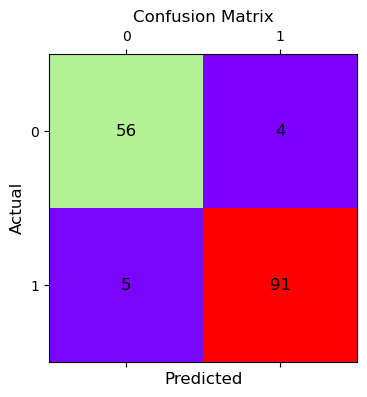

Classification Report:

Precision:0.943
Recall:0.942
f1-score:0.942


In [15]:
#Build Random Forest model
#create classifier and predict for test set
rf_model=create_classifier('random forest')
rf_model=build_model(rf_model, X_train[selectedFeatures], y_train)
rfc_prediction=predict(rf_model,X_test[selectedFeatures])

# metrics
rf_cmatrix=confusion_matrix(y_test,rfc_prediction)
graph_confusion_matrix(rf_cmatrix)

print("Classification Report:")
rf_c_report=classification_report(y_test,rfc_prediction,output_dict=True)
rf_precision=rf_c_report['weighted avg']['precision']
rf_recall=rf_c_report['weighted avg']['recall']
rf_f1score=rf_c_report['weighted avg']['f1-score']
print()
print(f"Precision:{rf_precision:.3f}\nRecall:{rf_recall:.3f}\
\nf1-score:{rf_f1score:.3f}")

Confusion matrix Report:  
Out of the 156 predictions, the random forest model predicted that 95 patients have diabetes and 61 patients do not have diabetes.
In reality only 96 patients have diabetes and 60 do not.

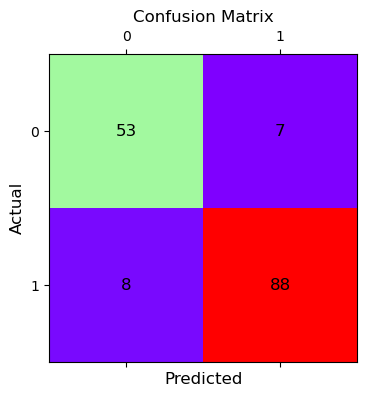

Classification Report:

Precision:0.904
Recall:0.904
f1-score:0.904


In [16]:
# Build naïve Bayes model
naive_model=create_classifier('naive bayes')
naive_model=build_model(naive_model, X_train[selectedFeatures], y_train)
naive_prediction=predict(naive_model,X_test[selectedFeatures])

# metrics
nb_cmatrix=confusion_matrix(y_test,naive_prediction)
graph_confusion_matrix(nb_cmatrix)

print("Classification Report:")
nb_c_report=classification_report(y_test,naive_prediction,output_dict=True)
#print(rf_c_report)
nb_precision=nb_c_report['weighted avg']['precision']
nb_recall=nb_c_report['weighted avg']['recall']
nb_f1score=nb_c_report['weighted avg']['f1-score']
print()
print(f"Precision:{nb_precision:.3f}\nRecall:{nb_recall:.3f}\
\nf1-score:{nb_f1score:.3f}")

Confusion matrix Report:  
Out of the 156 predictions, the naives bayes model predicted that 95 patients have diabetes and 61 patients do not have diabetes.
In reality only 96 patients have diabetes and 60 do not.

accuracy score: 0.9423076923076923


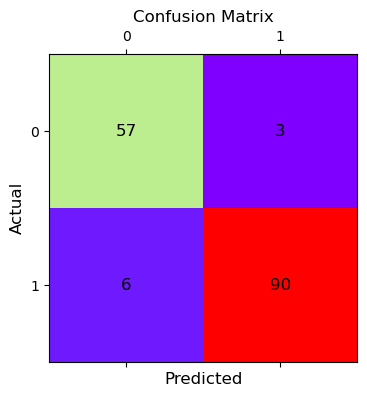

Classification Report:

Precision:0.944
Recall:0.942
f1-score:0.943


In [17]:
# Build artificial neural networks model

mlp = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(10, 4), solver='lbfgs', activation='relu', batch_size=32)

mlp.fit(X_train[selectedFeatures], y_train)
mlp_prediction=mlp.predict(X_test[selectedFeatures])
score=mlp.score(X_test[selectedFeatures], y_test)
print("accuracy score:", score)

# metrics
mlp_cmatrix=confusion_matrix(y_test,mlp_prediction)
graph_confusion_matrix(mlp_cmatrix)

print("Classification Report:")
mlp_c_report=classification_report(y_test,mlp_prediction,output_dict=True)
#print(rf_c_report)
mlp_precision=mlp_c_report['weighted avg']['precision']
mlp_recall=mlp_c_report['weighted avg']['recall']
mlp_f1score=mlp_c_report['weighted avg']['f1-score']
print()
print(f"Precision:{mlp_precision:.3f}\nRecall:{mlp_recall:.3f}\
\nf1-score:{mlp_f1score:.3f}")


Confusion matrix Report:  
Out of the 156 predictions, the artificial neural networks model predicted that 93 patients have diabetes and 63 patients do not have diabetes.
In reality only 96 patients have diabetes and 60 do not.

## Retrieve precision, recall, and F1-score values and graph them.

In [18]:
#Retrieve precision, recall, and f1-score
precisions={"random forest":rf_precision, "naïve Bayes":nb_precision, "neural network":mlp_precision}
recalls={"random forest":rf_recall, "naïve Bayes":nb_recall, "neural network":mlp_recall}
f1_scores={"random forest":rf_f1score, "naïve Bayes":nb_f1score, "neural network":mlp_f1score}

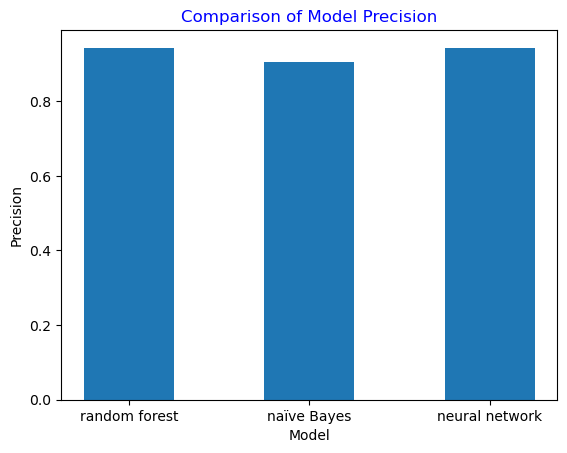

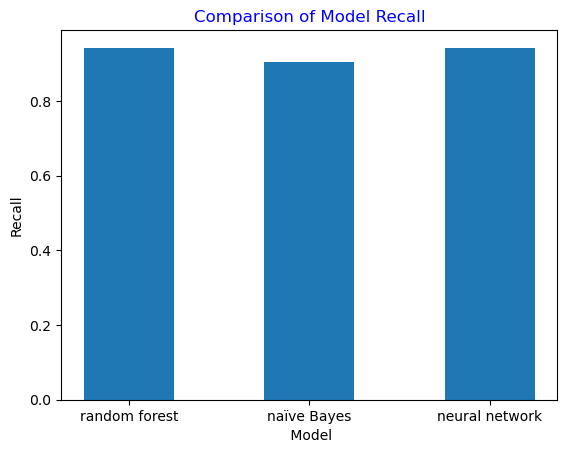

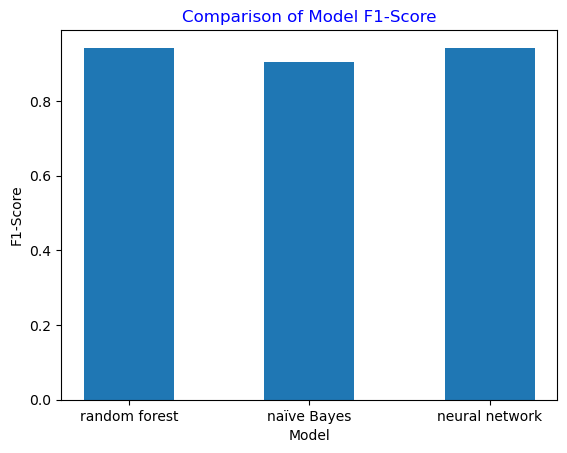

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot the graph of precision
models=list(precisions.keys())
modelPrecisions=list(precisions.values())
plt.bar(models, modelPrecisions, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Model", color='black')
plt.ylabel("Precision", color='black')
plt.title("Comparison of Model Precision", color='blue')
plt.show()

# Plot the graph of recall
models=list(recalls.keys())
modelRecalls=list(recalls.values())
plt.bar(models, modelRecalls, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel(" Model", color='black')
plt.ylabel("Recall", color='black')
plt.title("Comparison of Model Recall", color='blue')
plt.show()

# Plot the graph of f1score
models=list(f1_scores.keys())
modelF1scores=list(f1_scores.values())
plt.bar(models, modelF1scores, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Model", color='black')
plt.ylabel("F1-Score", color='black')
plt.title("Comparison of Model F1-Score", color='blue')
plt.show()
plt.tight_layout()

For all the metrics Naïve Bayes model performs worse than the other two models. With the Random forest model performing slightly 
lower than the Artificial neural network model. Therefore the Artificial neural network model performs best compared to the other two models 


#  Cross Validation

Performed 6-fold cross validation

In [20]:
# Random Forest model
X = diabetes_data[selectedFeatures]

rfc_precision  = cross_val_score(rf_model, X, y, cv=6, scoring='precision_weighted')
rfc_recall  = cross_val_score(rf_model, X, y, cv=6, scoring='recall_weighted')
rfc_f1score  = cross_val_score(rf_model, X, y, cv=6, scoring='f1_weighted')

average_precision_rf = rfc_precision.mean()
average_recall_rf = rfc_recall.mean()
average_f1score_rf = rfc_f1score.mean()
print("Random Forest model Cross-validated scores:\n")
print("Precision:",average_precision_rf)
print("Recall:",average_recall_rf)
print("f1-score:",average_f1score_rf)

Random Forest model Cross-validated scores:

Precision: 0.9527511755964007
Recall: 0.952085004009623
f1-score: 0.9517957373422844


In [21]:
# Naïve Bayes model
nbc_precision  = cross_val_score(naive_model, X, y, cv=6, scoring='precision_weighted')
nbc_recall  = cross_val_score(naive_model, X, y, cv=6, scoring='recall_weighted')
nbc_f1score  = cross_val_score(naive_model, X, y, cv=6, scoring='f1_weighted')


average_precision_nb = nbc_precision.mean()
average_recall_nb = nbc_recall.mean()
average_f1score_nb = nbc_f1score.mean()

print("Naïve Bayes model Cross-validated scores:\n")
print("Precision:",average_precision_nb)
print("Recall:",average_recall_nb)
print("f1-score:",average_f1score_nb)

Naïve Bayes model Cross-validated scores:

Precision: 0.8830238999922903
Recall: 0.8770382250735098
f1-score: 0.8748834337783343


In [22]:
# artificial neural network model
nnc_precision  = cross_val_score(mlp, X, y, cv=6, scoring='precision_weighted')
nnc_recall  = cross_val_score(mlp, X, y, cv=6, scoring='recall_weighted')
nnc_f1score  = cross_val_score(mlp, X, y, cv=6, scoring='f1_weighted')

average_precision_nn = nnc_precision.mean()
average_recall_nn = nnc_recall.mean()
average_f1score_nn = nnc_f1score.mean()

print("Artificial neural network model Cross-validated scores:\n")
print("Precision:",average_precision_nn)
print("Recall:",average_recall_nn)
print("f1-score:",average_f1score_nn)


Artificial neural network model Cross-validated scores:

Precision: 0.9435516239105389
Recall: 0.9425064599483203
f1-score: 0.9426109457403874


## Accuracy Visualizations

In [23]:
#Retrieve precision, recall, and f1-score
    precisions={"random forest":average_precision_rf, "naïve Bayes":average_precision_nb, "neural network":average_precision_nn}
    recalls={"random forest":average_recall_rf, "naïve Bayes":average_recall_nb, "neural network":average_recall_nn}
f1_scores={"random forest":average_f1score_rf, "naïve Bayes":average_f1score_nb, "neural network":average_f1score_nn}

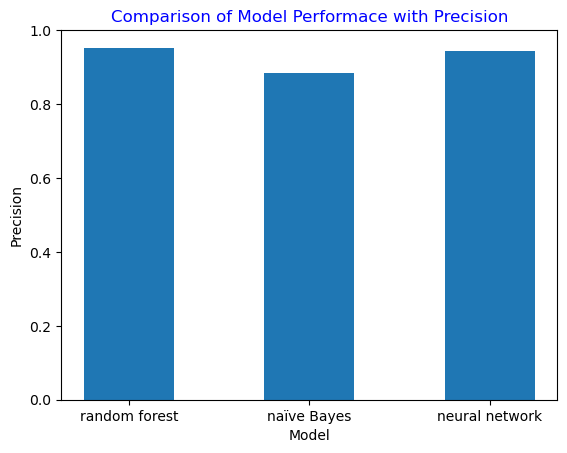

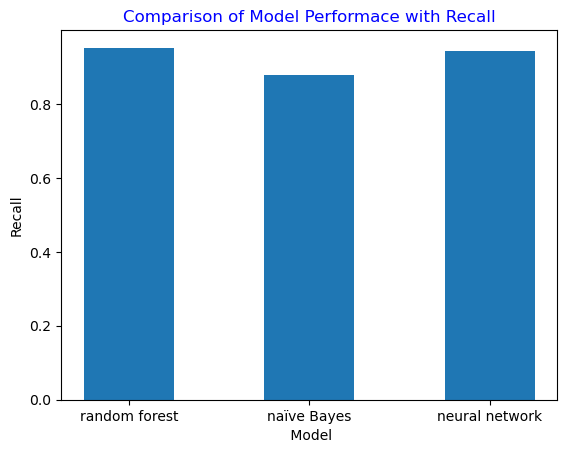

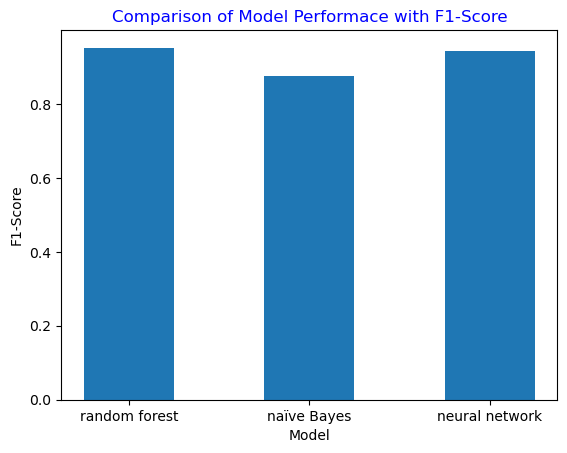

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the graph of precision
models=list(precisions.keys())
modelPrecisions=list(precisions.values())
plt.bar(models, modelPrecisions, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Model", color='black')
plt.ylabel("Precision", color='black')
plt.title("Comparison of Model Performace with Precision", color='blue')
plt.show()

# Plot the graph of recall
models=list(recalls.keys())
modelRecalls=list(recalls.values())
plt.bar(models, modelRecalls, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel(" Model", color='black')
plt.ylabel("Recall", color='black')
plt.title("Comparison of Model Performace with Recall", color='blue')
plt.show()

# Plot the graph of f1score
models=list(f1_scores.keys())
modelF1scores=list(f1_scores.values())
plt.bar(models, modelF1scores, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Model", color='black')
plt.ylabel("F1-Score", color='black')
plt.title("Comparison of Model Performace with F1-Score", color='blue')
plt.show()
plt.tight_layout()

For all the metrics, Naïve Bayes model performs worse than the other two models. With the Artificial neural network model performing slightly lower than the Random forest model. Thus, the Random forest model performs the best.

# Performance comparison of the algorithms under percentage split and cross-validation.

In [25]:
#installing the library if not installed
# pip install prettytable 

In [26]:
#percentage split
print("Model Performance under Percentage split")

percentage_split  = PrettyTable(["Algorithm","Precision", "Recall", "f1-score"])

percentage_split.add_row(["Random forest", rf_precision, rf_recall, rf_f1score])
percentage_split.add_row(["Naïve Bayes", nb_precision, nb_recall, nb_f1score])
percentage_split.add_row(["Artificial neural network", mlp_precision, mlp_recall, mlp_f1score])
  
print(percentage_split)

# cross-validation.
print("\nModel Performance under cross-validation")

cross_validation  = PrettyTable(["Algorithm","Precision", "Recall", "f1-score"])

cross_validation.add_row(["Random forest", average_precision_rf, average_recall_rf, average_f1score_rf])
cross_validation.add_row(["Naïve Bayes", average_precision_nb, average_recall_nb, average_f1score_nb])
cross_validation.add_row(["Artificial neural network", average_precision_nn, average_recall_nn, average_f1score_nn])
  
print(cross_validation)



Model Performance under Percentage split
+---------------------------+--------------------+--------------------+--------------------+
|         Algorithm         |     Precision      |       Recall       |      f1-score      |
+---------------------------+--------------------+--------------------+--------------------+
|       Random forest       | 0.9425632176279287 | 0.9423076923076923 | 0.9423950632898752 |
|        Naïve Bayes        | 0.9042145085285722 | 0.9038461538461539 | 0.9039917721497921 |
| Artificial neural network | 0.9435188467446531 | 0.9423076923076923 | 0.9425533815777717 |
+---------------------------+--------------------+--------------------+--------------------+

Model Performance under cross-validation
+---------------------------+--------------------+--------------------+--------------------+
|         Algorithm         |     Precision      |       Recall       |      f1-score      |
+---------------------------+--------------------+--------------------+---------

The Random forest algorithm performed better under cross-validation compared to percentage split.  
The Naïve Bayes algorithm performed better under percentage split compared to cross-validation.  
The Artificial neural network algorithm performed slightly better under cross-validation compared to percentage split.




Based on the cross-validation results, it is recommended to apply the Random Forest model.